## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  56.603579  1305.889336  0.654532   1.116247  1.590717
1  48.986982   963.484143  0.273984   3.520441  1.549221
2  65.796213  1525.227212  0.005404   6.221439 -0.026572
3  50.784928  1171.856217  0.399370  10.887732  1.311908
4  80.756486  1222.017201  0.202551   9.049432  1.159142


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9465248	total: 65.8ms	remaining: 1m 5s
1:	learn: 0.9381160	total: 66.5ms	remaining: 33.2s
2:	learn: 0.9286184	total: 66.9ms	remaining: 22.2s
3:	learn: 0.9207651	total: 67.4ms	remaining: 16.8s
4:	learn: 0.9124405	total: 67.9ms	remaining: 13.5s
5:	learn: 0.9036471	total: 70.1ms	remaining: 11.6s
6:	learn: 0.8969349	total: 70.4ms	remaining: 9.99s
7:	learn: 0.8881427	total: 71.2ms	remaining: 8.82s
8:	learn: 0.8805489	total: 71.7ms	remaining: 7.9s
9:	learn: 0.8738998	total: 72.4ms	remaining: 7.16s
10:	learn: 0.8661273	total: 73ms	remaining: 6.57s
11:	learn: 0.8575280	total: 73.5ms	remaining: 6.05s
12:	learn: 0.8501601	total: 73.9ms	remaining: 5.61s
13:	learn: 0.8430320	total: 74.4ms	remaining: 5.24s
14:	learn: 0.8368064	total: 74.8ms	remaining: 4.91s
15:	learn: 0.8289414	total: 75.5ms	remaining: 4.64s
16:	learn: 0.8221163	total: 76.1ms	remaining: 4.4s
17:	learn: 0.8175233	total: 76.5ms	remaining: 4.17s
18:	learn: 0.8093651	total: 77ms	remaining: 3.97

87:	learn: 0.4889617	total: 117ms	remaining: 1.21s
88:	learn: 0.4865486	total: 118ms	remaining: 1.21s
89:	learn: 0.4839363	total: 119ms	remaining: 1.2s
90:	learn: 0.4813813	total: 119ms	remaining: 1.19s
91:	learn: 0.4780494	total: 120ms	remaining: 1.18s
92:	learn: 0.4753031	total: 120ms	remaining: 1.17s
93:	learn: 0.4724245	total: 120ms	remaining: 1.16s
94:	learn: 0.4693258	total: 121ms	remaining: 1.15s
95:	learn: 0.4662281	total: 121ms	remaining: 1.14s
96:	learn: 0.4633690	total: 122ms	remaining: 1.13s
97:	learn: 0.4605240	total: 122ms	remaining: 1.12s
98:	learn: 0.4577697	total: 123ms	remaining: 1.11s
99:	learn: 0.4552551	total: 123ms	remaining: 1.11s
100:	learn: 0.4539683	total: 123ms	remaining: 1.1s
101:	learn: 0.4514554	total: 124ms	remaining: 1.09s
102:	learn: 0.4483162	total: 124ms	remaining: 1.08s
103:	learn: 0.4455311	total: 125ms	remaining: 1.08s
104:	learn: 0.4433917	total: 126ms	remaining: 1.07s
105:	learn: 0.4407365	total: 126ms	remaining: 1.06s
106:	learn: 0.4382252	total

397:	learn: 0.1848365	total: 271ms	remaining: 411ms
398:	learn: 0.1844057	total: 272ms	remaining: 410ms
399:	learn: 0.1838828	total: 273ms	remaining: 409ms
400:	learn: 0.1837230	total: 273ms	remaining: 408ms
401:	learn: 0.1830998	total: 274ms	remaining: 408ms
402:	learn: 0.1829424	total: 275ms	remaining: 407ms
403:	learn: 0.1825753	total: 275ms	remaining: 406ms
404:	learn: 0.1818000	total: 276ms	remaining: 405ms
405:	learn: 0.1813891	total: 276ms	remaining: 404ms
406:	learn: 0.1809741	total: 277ms	remaining: 403ms
407:	learn: 0.1808222	total: 277ms	remaining: 402ms
408:	learn: 0.1801251	total: 278ms	remaining: 401ms
409:	learn: 0.1799764	total: 278ms	remaining: 400ms
410:	learn: 0.1794828	total: 278ms	remaining: 399ms
411:	learn: 0.1792685	total: 279ms	remaining: 398ms
412:	learn: 0.1791257	total: 279ms	remaining: 397ms
413:	learn: 0.1787877	total: 280ms	remaining: 396ms
414:	learn: 0.1786475	total: 280ms	remaining: 395ms
415:	learn: 0.1782344	total: 281ms	remaining: 394ms
416:	learn: 

702:	learn: 0.0772776	total: 419ms	remaining: 177ms
703:	learn: 0.0772365	total: 419ms	remaining: 176ms
704:	learn: 0.0769135	total: 420ms	remaining: 176ms
705:	learn: 0.0766990	total: 422ms	remaining: 176ms
706:	learn: 0.0764364	total: 423ms	remaining: 175ms
707:	learn: 0.0761695	total: 424ms	remaining: 175ms
708:	learn: 0.0760800	total: 424ms	remaining: 174ms
709:	learn: 0.0757804	total: 425ms	remaining: 173ms
710:	learn: 0.0755212	total: 425ms	remaining: 173ms
711:	learn: 0.0752951	total: 425ms	remaining: 172ms
712:	learn: 0.0750989	total: 426ms	remaining: 171ms
713:	learn: 0.0748466	total: 426ms	remaining: 171ms
714:	learn: 0.0747588	total: 427ms	remaining: 170ms
715:	learn: 0.0745135	total: 427ms	remaining: 169ms
716:	learn: 0.0742929	total: 428ms	remaining: 169ms
717:	learn: 0.0740355	total: 428ms	remaining: 168ms
718:	learn: 0.0735386	total: 429ms	remaining: 168ms
719:	learn: 0.0732361	total: 429ms	remaining: 167ms
720:	learn: 0.0730383	total: 430ms	remaining: 166ms
721:	learn: 

986:	learn: 0.0383998	total: 571ms	remaining: 7.53ms
987:	learn: 0.0382708	total: 572ms	remaining: 6.95ms
988:	learn: 0.0382081	total: 573ms	remaining: 6.37ms
989:	learn: 0.0380019	total: 573ms	remaining: 5.79ms
990:	learn: 0.0378498	total: 573ms	remaining: 5.21ms
991:	learn: 0.0376486	total: 574ms	remaining: 4.63ms
992:	learn: 0.0375000	total: 574ms	remaining: 4.05ms
993:	learn: 0.0373037	total: 575ms	remaining: 3.47ms
994:	learn: 0.0371812	total: 575ms	remaining: 2.89ms
995:	learn: 0.0370375	total: 576ms	remaining: 2.31ms
996:	learn: 0.0368457	total: 576ms	remaining: 1.73ms
997:	learn: 0.0367309	total: 577ms	remaining: 1.16ms
998:	learn: 0.0365776	total: 577ms	remaining: 577us
999:	learn: 0.0364461	total: 578ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.38817182491067204


ABC Pre-generator MAE 1.101499420670574


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

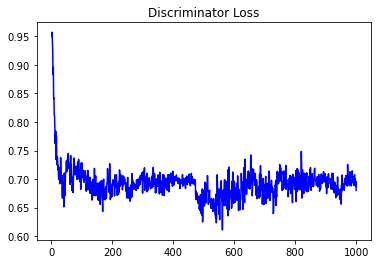

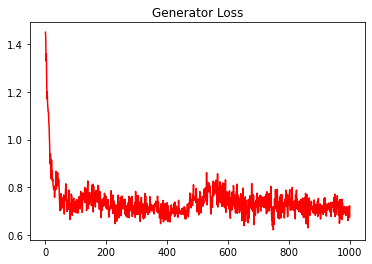

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.624758356269449


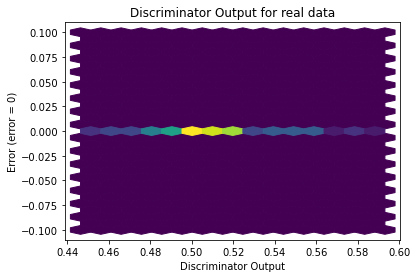

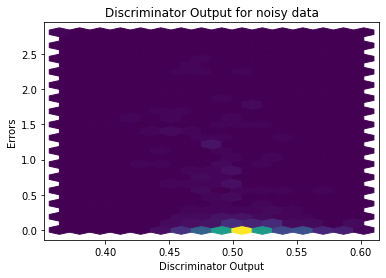

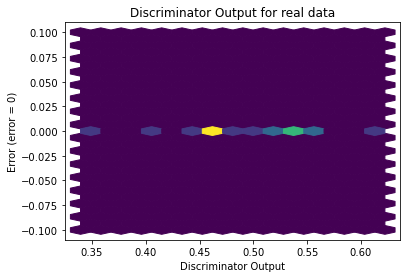

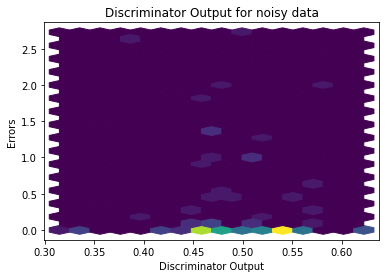

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

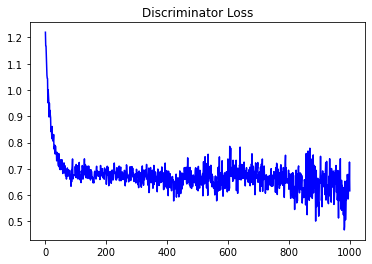

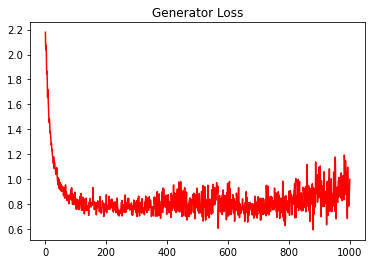

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.774145974971354


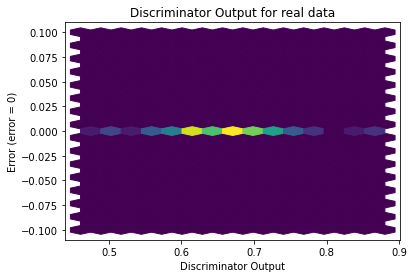

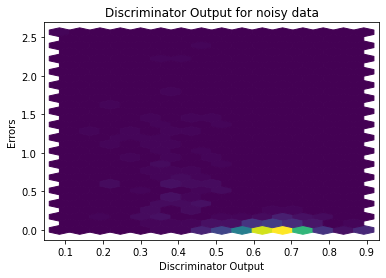

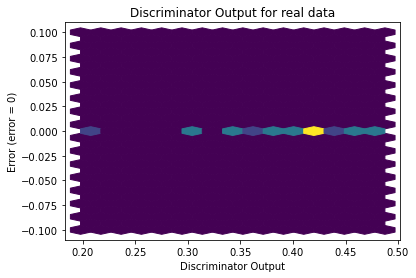

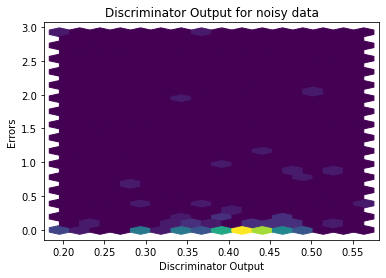

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


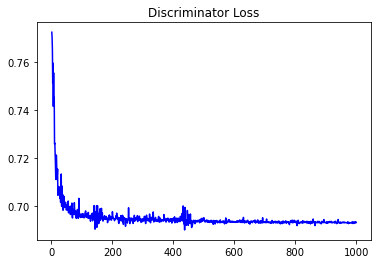

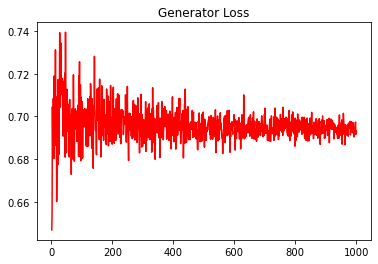

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
1.0644899408519268


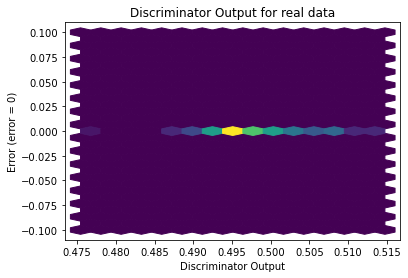

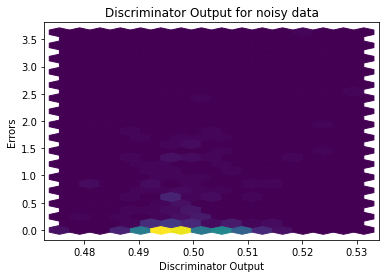

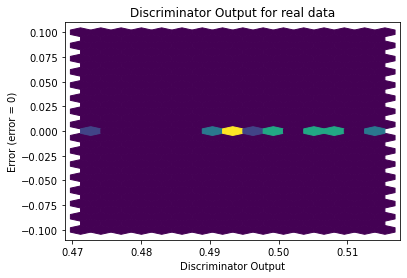

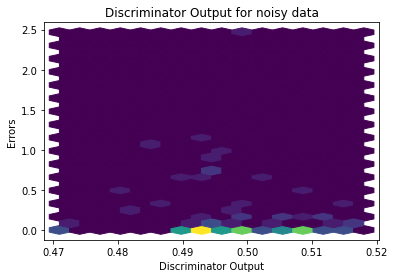

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


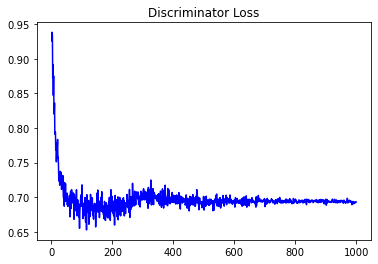

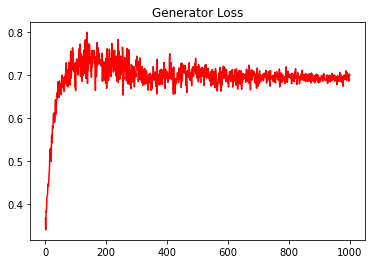

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.9948450529128313


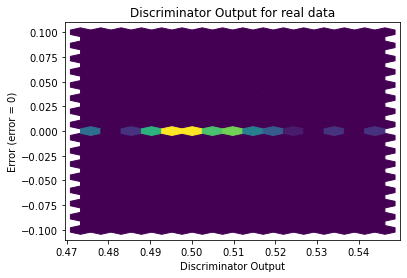

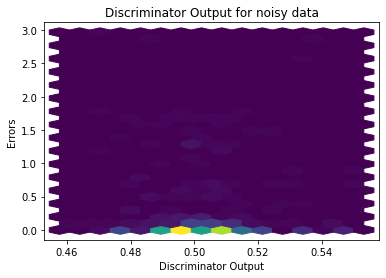

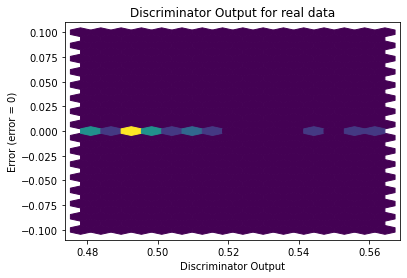

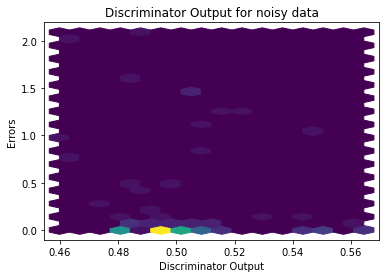

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0266]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1376]], requires_grad=True)
